In [87]:
%reload_ext autoreload

In [88]:
# Imports
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from tabulate import tabulate

sys.path.append('../lib')
import utils
import preprocessing as pp

def log_plot(columns):
    plt.figure(figsize=(20,15))

    for column in columns:
        plt.plot(np.sort(np.log(df_raw[column])), label=column)

    plt.legend(loc='lower right')
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

COLUMN_NAME = 'golive_days'

In [114]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)
        
def logify_feature(df, feature, drop=False):
    df[feature + '_log'] = np.log(df[feature])
    df[feature + '_log'] = df[feature + '_log'].replace(-np.inf, np.nan)
    if drop:
        df = df.drop(columns=[feature])
    return df

In [115]:
df_raw = logify_feature(df_raw, COLUMN_NAME)

In [116]:
df_raw.columns

Index(['username', 'licence_registration_date', 'licence_status', 'url',
       'golive_date', 'canceldate', 'plan', 'days_active', 'account_status',
       'customer_account_status', 'nps', 'last_login_days', 'golive_days',
       'last_month_total', 'mtd_total', 'last_month_open', 'mtd_open',
       'last_month_closed', 'mtd_closed', 'last_month_age_hours',
       'mtd_age_hours', 'month_total_avg', 'open_month_avg',
       'closed_month_avg', 'age_hours_month_avg', 'interactions_total',
       'interactions_completed', 'interactions_no_response',
       'interactions_no_onboarding', 'interactions_completed_training',
       'churn_concern_cases_total', 'churn_concern_cases_open',
       'total_churn_concern_cases_age', 'total_churn_concern_cases_age_avg',
       'churned', 'golive_days_log'],
      dtype='object')

In [117]:
df_raw[COLUMN_NAME].value_counts()

1.0        69
2.0        58
6.0        55
7.0        46
4.0        44
           ..
340.0       1
284.0       1
712.0       1
42305.0     1
899.0       1
Name: golive_days, Length: 550, dtype: int64

In [118]:
df_raw[COLUMN_NAME].describe()

count     3225.000000
mean       364.170233
std       3191.332829
min          0.000000
25%         23.000000
50%         65.000000
75%        159.000000
max      43560.000000
Name: golive_days, dtype: float64

In [119]:
utils.general_stats(df_raw, COLUMN_NAME)

golive_days

Min: 0.0
Max: 43560.0
Mean: 364.17023255813956
Trimmed Mean: nan
Median: 65.0
Std: 0    1.0
dtype: float64
CV: 3191.3328288387283


In [120]:
for plan in df_raw.plan[~pd.isnull(df_raw.plan)].unique():
    print(f"{plan} mean: {df_raw[COLUMN_NAME][df_raw.plan == plan].mean()}")
    print(f"{plan} median: {df_raw[COLUMN_NAME][df_raw.plan == plan].median()}")

STANDARD mean: 518.5567010309278
STANDARD median: 37.0
LISTNSEND mean: nan
LISTNSEND median: nan
PREMIUM mean: 522.16
PREMIUM median: 59.0
BUSINESS + mean: 588.0
BUSINESS + median: 588.0
TRIAL mean: 43153.5
TRIAL median: 43153.5
ULTIMATE mean: 293.1111111111111
ULTIMATE median: 231.0
CUSTOM mean: 10816.5
CUSTOM median: 252.0
PLAN-S mean: 68.59362549800797
PLAN-S median: 33.0
GOLD mean: nan
GOLD median: nan
PLAN-M mean: 84.39285714285714
PLAN-M median: 57.0
PREMIER mean: nan
PREMIER median: nan
START mean: nan
START median: nan
BASIC mean: nan
BASIC median: nan
BUSINESS mean: nan
BUSINESS median: nan
PLAN-S-17Q2 mean: 220.9964412811388
PLAN-S-17Q2 median: 32.0
LIST N SEND SILVER mean: nan
LIST N SEND SILVER median: nan
PLAN-XS mean: 34.4375
PLAN-XS median: 25.0
BRONZE mean: nan
BRONZE median: nan
ULTIMATE PLUS mean: nan
ULTIMATE PLUS median: nan
PLAN-L-19Q1 mean: 175.86703601108033
PLAN-L-19Q1 median: 100.0
PLAN-M-17Q2 mean: 651.2432432432432
PLAN-M-17Q2 median: 40.0
PLAN-360-19Q1 mean:

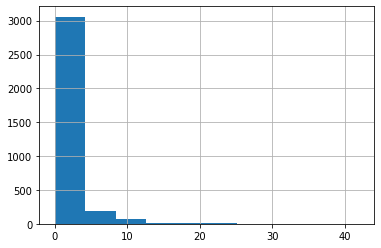

In [111]:
df_raw[COLUMN_NAME].hist()

In [112]:
df_processed = pp.prepare_data(df_raw)

Sorting dataframe by licence_registration_date ...
Defaulting 'last_login_days' for missing values to the plans mean or platform medeian ...
  Platform 'last_login_days' median: 12.0
  Platform 'last_login_days' mean: 17.153525239883187
  List records that still have NaN in them for feature 'last_login_days' ...
  0
Defaulting 'mtd_total' for missing values to the plans mean or platform medeian ...
  Platform 'mtd_total' median: 0.0
  Platform 'mtd_total' mean: 0.22980997624703087
  List records that still have NaN in them for feature 'mtd_total' ...
  0
Defaulting all NaN values with median ...
Binning last_login_days
fortnight    4360
month         985
month+        802
day           350
week            0
few_days        0
Name: last_login_categories, dtype: int64
Binning NPS data
Fixing days_active abnormal values ...
Bin days_active ...
One-hot encoding customer_account_status
One-hot encoding plan
One-hot encoding nps
One-hot encoding last_login_categories
One-hot encoding days_ac

In [99]:
df_processed.columns

Index(['username', 'licence_status', 'url', 'last_login_days', 'golive_days',
       'last_month_total', 'mtd_total', 'last_month_open', 'mtd_open',
       'last_month_closed',
       ...
       'golive_Day', 'golive_Dayofweek', 'golive_Dayofyear',
       'golive_Is_month_end', 'golive_Is_month_start', 'golive_Is_quarter_end',
       'golive_Is_quarter_start', 'golive_Is_year_end', 'golive_Is_year_start',
       'golive_Elapsed'],
      dtype='object', length=118)

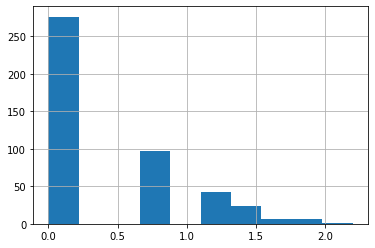

In [100]:
df_processed[COLUMN_NAME + "_log"].hist()

In [101]:
def data_distribution(df, feature):
    feature_mean = df[feature].mean()
    feature_std = df[feature].std()

    for i in [1,2,3]:
        output = round(len(df[COLUMN_NAME].loc[(df[COLUMN_NAME] > (feature_mean - (feature_std * i))) &
                                            (df[COLUMN_NAME] < (feature_mean + (feature_std * i)))]) / len(df) * 100,2)
        print(f"{i} STD: {output}% of the data fits in here")

data_distribution(df_raw, COLUMN_NAME)

1 STD: 44.87% of the data fits in here
2 STD: 49.11% of the data fits in here
3 STD: 50.61% of the data fits in here


In [102]:
utils.general_stats(df_processed, COLUMN_NAME)

mtd_total

Min: 0
Max: 9
Mean: 0.11928582422656611
Trimmed Mean: 0.0
Median: 0.0
Std: 0    0
dtype: int64
CV: 0.530845577188186


In [18]:
from pdpbox import pdp

x = get_sample(X_train, 2000)

def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feature = feat, model_features = x.columns, num_grid_points=30)
    #p = pdp.pdp_isolate(m, x, feature = feat, num_grid_points=30)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

%time plot_pdp('COLUMN_NAME')

NameError: name 'get_sample' is not defined

In [ ]:
plot_pdp('days_active', clusters=5)

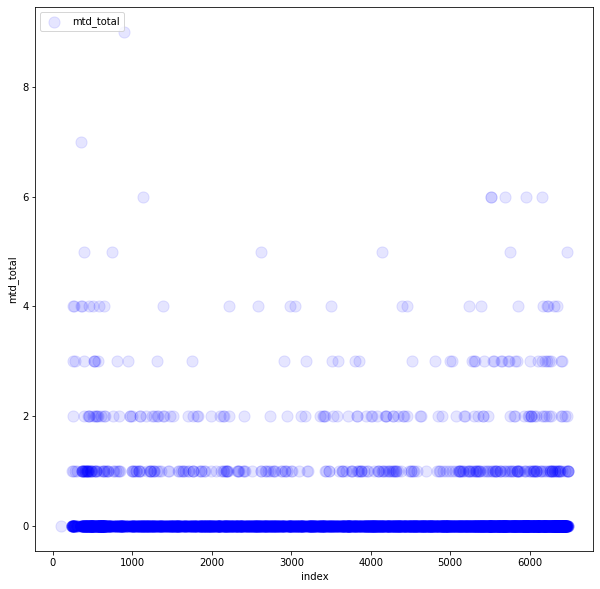

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df_raw.index, df_raw[COLUMN_NAME],
            c='b', marker='.', label=COLUMN_NAME,
            s=500, alpha=.1)

plt.legend(loc='upper left')
plt.ylabel(COLUMN_NAME)
plt.xlabel("index")

plt.show()

In [25]:
def data_distribution(df, feature):
    feature_mean = df[feature].mean()
    feature_std = df[feature].std()

    for i in [1,2,3]:
        output = round(len(df[COLUMN_NAME].loc[(df[COLUMN_NAME] > (feature_mean - (feature_std * i))) &
                                            (df[COLUMN_NAME] < (feature_mean + (feature_std * i)))]) / len(df) * 100,2)
        print(output)
        
data_distribution(df_raw, COLUMN_NAME)

44.87
49.11
50.61


In [28]:
df_raw[df_raw[COLUMN_NAME].isna() == True]

,username,licence_registration_date,licence_status,url,golive_date,canceldate,plan,days_active,account_status,customer_account_status,...,interactions_total,interactions_completed,interactions_no_response,interactions_no_onboarding,interactions_completed_training,churn_concern_cases_total,churn_concern_cases_open,total_churn_concern_cases_age,total_churn_concern_cases_age_avg,churned
0,12vFridges,2013-11-28,CANCELLED,www.kickassproducts.com.au,NaT,2016-06-07,STANDARD,922.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1808thestore,NaT,CANCELLED,1808thestore.mylistandsend.com,NaT,NaT,LISTNSEND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,4sme,NaT,CANCELLED,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,55parrots,2014-03-10,CANCELLED,55parrots.neto.com.au,NaT,2018-01-29,STANDARD,1421.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5thelementexped,2014-05-12,CANCELLED,www.5thelementexpeditions.com,NaT,2017-11-20,PREMIUM,1288.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,NewtonFurniture,2013-11-25,CANCELLED,www.jackynewton.com.au,NaT,2016-09-12,ULTIMATE,1022.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6493,nicholas262411061112,2013-11-27,CANCELLED,nicheclub.neto.com.au,NaT,NaT,NaN,2173.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6494,nicknimbleneta6,2013-11-25,CANCELLED,www.diaxi.com,NaT,2016-09-08,BRONZE,1018.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6495,nictimecodest23,2013-11-25,CANCELLED,www.zeusadventuregear.com.au,NaT,NaT,NaN,2175.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [29]:
df_raw[COLUMN_NAME].describe()

count    3368.000000
mean        0.229810
std         0.719727
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: mtd_total, dtype: float64

In [30]:
df_raw[COLUMN_NAME].value_counts()

0.0    2915
1.0     276
2.0      97
3.0      42
4.0      24
6.0       6
5.0       6
9.0       1
7.0       1
Name: mtd_total, dtype: int64

In [105]:
from pdpbox import pdp

x = get_sample(X_train, 2000)

def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feature = feat, model_features = x.columns, num_grid_points=30)
    #p = pdp.pdp_isolate(m, x, feature = feat, num_grid_points=30)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

%time plot_pdp(COLUMN_NAME)

In [106]:
np.sort(df_raw[COLUMN_NAME])[1000:2000]

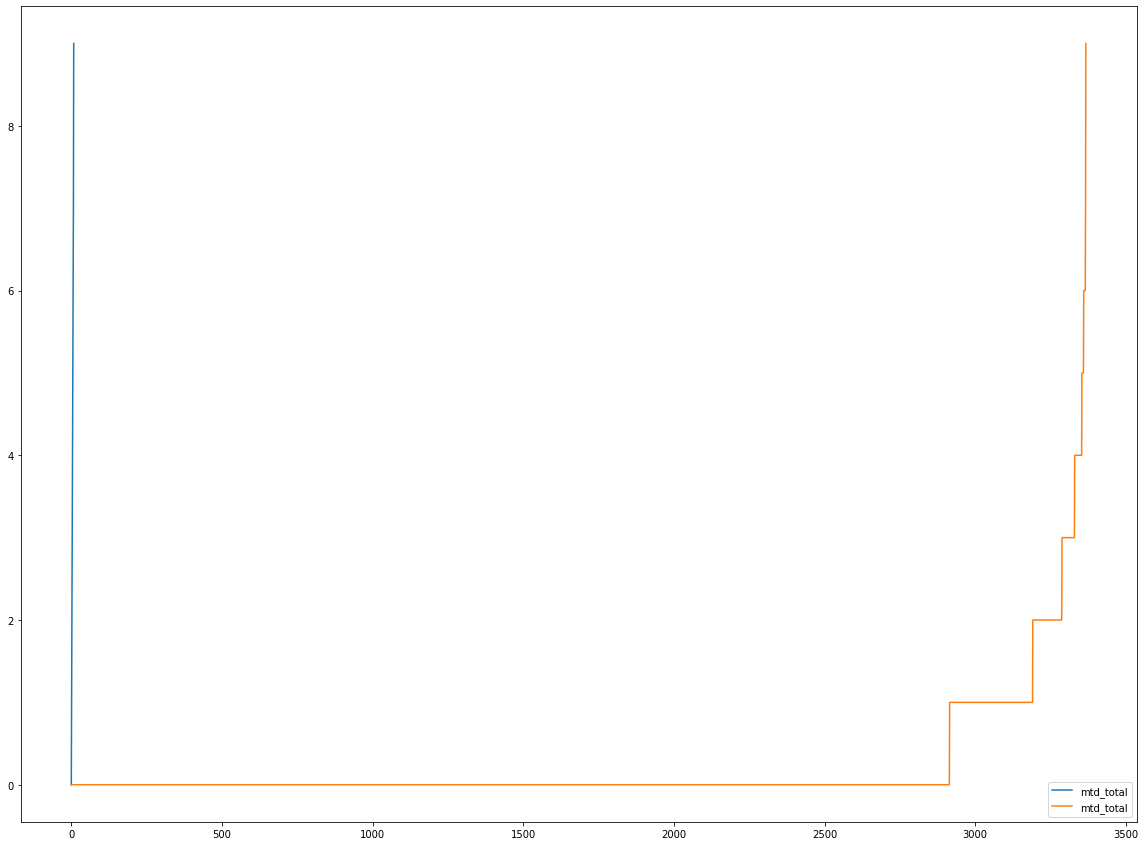

In [31]:
# Plot sorted unique and non unique values for COLUMN_NAME

plt.figure(figsize=(20,15))

plt.plot(np.unique(np.sort(df_raw[COLUMN_NAME])), label=COLUMN_NAME)
plt.plot(np.sort(df_raw[COLUMN_NAME]), label=COLUMN_NAME)

plt.legend(loc='lower right')
plt.show()

In [40]:
from scipy import stats
df_copy = abs(df_raw[COLUMN_NAME])

#boxcox, bc_params = stats.boxcox(df_copy)
#bc_params

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6492   NaN
6493   NaN
6494   NaN
6495   NaN
6496   NaN
Name: mtd_total, Length: 6497, dtype: float64


In [114]:
df_processed[COLUMN_NAME + '_bc'] = boxcox

Text(0,0.5,'Occurrence')

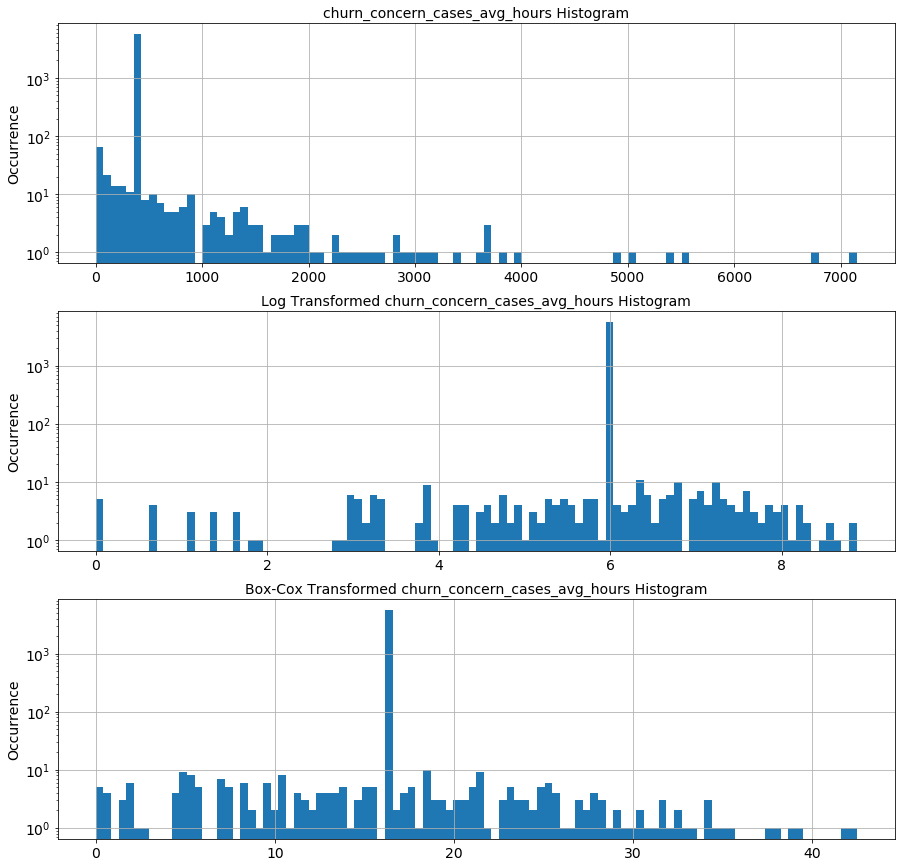

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,15))

# original review count histogram
df_processed[COLUMN_NAME].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title(COLUMN_NAME + ' Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
df_processed[COLUMN_NAME + '_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed ' + COLUMN_NAME + ' Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)# review count after optimal Box-Cox transform

df_processed[COLUMN_NAME + '_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed ' + COLUMN_NAME + ' Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

In [121]:
print(f"Log transform skew: {df_processed[COLUMN_NAME + '_log'].skew()}")
print(f"Box-Cox transform skew: {df_processed[COLUMN_NAME + '_bc'].skew()}")

Log transform skew: -6.599977513350912
Box-Cox transform skew: 1.7393019055073713


In [122]:
df_processed[COLUMN_NAME + '_log'].describe()

count    5885.000000
mean        5.966895
std         0.428202
min         0.000000
25%         5.986452
50%         5.986452
75%         5.986452
max         8.874868
Name: churn_concern_cases_avg_hours_log, dtype: float64

In [123]:
df_processed[COLUMN_NAME + '_bc'].describe()

count    5889.000000
mean       16.302658
std         2.012782
min         0.000000
25%        16.290015
50%        16.290015
75%        16.290015
max        42.483867
Name: churn_concern_cases_avg_hours_bc, dtype: float64

In [127]:
general_stats(df_processed, f"{COLUMN_NAME}_log")

churn_concern_cases_avg_hours_log

Min: 0.0
Max: 8.874867635688053
Mean: 5.966894977879099
Trimmed Mean: 5.986452005284437
Median: 5.986452005284438
Std: 0.42820243081206477
CV: 0.07176302455456775


In [131]:
general_stats(df_processed, f"{COLUMN_NAME}_bc")

churn_concern_cases_avg_hours_bc

Min: 0.0
Max: 42.4838674597342
Mean: 16.30265752220549
Trimmed Mean: 16.290014936864818
Median: 16.290014936864818
Std: 2.0127821052430592
CV: 0.1234634354859932


In [134]:
data_distribution(df_processed, f"{COLUMN_NAME}_log")

0.02
0.02
0.08


In [135]:
data_distribution(df_processed, f"{COLUMN_NAME}_bc")

0.03
0.14
0.22
